#### Imports

In [1]:
from cnn import *
import cv2
from os import listdir
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#### Dataset

In [2]:
# Root Folder Name
FOLDER_NAME = 'Dataset'
# Class Folders
folders = listdir(FOLDER_NAME)
NR_CLASSES = len(folders)
# Walk over folders
X, Y = [], []
for i in range(NR_CLASSES):
    folder = folders[i]
    images = listdir(FOLDER_NAME + '/' + folder)
    print('Folder', i+1, '-', folder, ' | Size:', len(images))
    # Walk over images
    data_X, data_Y = [], []
    for image in images:
        path = FOLDER_NAME + '/' + folder + '/' + image
        # Process Image
        size = 50
        raw = cv2.imread(path)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(gray, (size, size))
        # Add to class data
        data_X.append(img / 255)
        data_Y.append(np.eye(NR_CLASSES)[i].reshape([-1, 1]))
    # Add to Data
    #data_X, data_Y = shuffle(data_X, data_Y)
    X.append(data_X); Y.append(data_Y)

Folder 1 - basophil  | Size: 1218
Folder 2 - eosinophil  | Size: 3117
Folder 3 - erythroblast  | Size: 1551
Folder 4 - ig  | Size: 2895
Folder 5 - lymphocyte  | Size: 1214
Folder 6 - monocyte  | Size: 1420
Folder 7 - neutrophil  | Size: 3329
Folder 8 - platelet  | Size: 2348


In [3]:
# Split training / remaining
X_train_all, Y_train_all, X_rem_all, Y_rem_all = [], [], [], [] 
ex_per_class = 1200
for data_X, data_Y in zip(X, Y):
    X_train_all.extend(data_X[:ex_per_class])
    Y_train_all.extend(data_Y[:ex_per_class])
    X_rem_all.extend(data_X[ex_per_class:])
    Y_rem_all.extend(data_Y[ex_per_class:])
# Sequence training
X_train_seq, Y_train_seq = [], []
for i in range(ex_per_class):
    for j in range(NR_CLASSES):
        index = i + j * ex_per_class
        X_train_seq.append(X_train_all[index]); Y_train_seq.append(Y_train_all[index])
# Convert to numpy arrays
X_train = np.array(X_train_seq).reshape([len(X_train_seq), 1, size, size])
Y_train = np.array(Y_train_seq).reshape([len(Y_train_seq), -1, 1])
X_rem = np.array(X_rem_all).reshape([len(X_rem_all), 1, size, size])
Y_rem = np.array(Y_rem_all).reshape([len(Y_rem_all), -1, 1])
# Shuffle remaining
X_rem, Y_rem = shuffle(X_rem, Y_rem)
# Split Validation / Test
half = int(len(X_rem) / 2)
X_valid, Y_valid = X_rem[:half], Y_rem[:half]
X_test, Y_test = X_rem[half:], Y_rem[half:]
# Print
print('Total training examples:', len(X_train))
print('Total validation examples:', len(X_valid))
print('Total testing examples:', len(X_test))

Total training examples: 9600
Total validation examples: 3746
Total testing examples: 3746


#### Model

In [4]:
model = CNN()
# Conv 1
conv1 = Convolution(16, 3, X_train[0].shape)
model.add(conv1)
# Pool 1
pool1 = Pool(3, conv1.out_shape, 3)
model.add(pool1)
# Conv 2
conv2 = Convolution(32, 5, pool1.out_shape)
model.add(conv2)
# Pool 2
pool2 = Pool(2, conv2.out_shape, 2)
model.add(pool2)
# Flat
flat = Flat()
model.add(flat)
# Hidden
hidden1 = Dense(512, pool2.size) #1152
model.add(hidden1)
# Hidden
hidden2 = Dense(64, 512)
model.add(hidden2)
# Out
out = Dense(8, 64, 'softmax')
model.add(out)

In [5]:
%%time
model.train(X_train, Y_train, epochs = 12, alpha = 0.001, batch_size = 150, X_valid = X_valid, Y_valid = Y_valid)


EPOCH 1/12
Iteration 1/64 - Cost: 0.488
Iteration 2/64 - Cost: 0.340
Iteration 3/64 - Cost: 0.369
Iteration 4/64 - Cost: 0.340
Iteration 5/64 - Cost: 0.290
Iteration 6/64 - Cost: 0.272
Iteration 7/64 - Cost: 0.274
Iteration 8/64 - Cost: 0.270
Iteration 9/64 - Cost: 0.266
Iteration 10/64 - Cost: 0.265
Iteration 11/64 - Cost: 0.262
Iteration 12/64 - Cost: 0.264
Iteration 13/64 - Cost: 0.264
Iteration 14/64 - Cost: 0.262
Iteration 15/64 - Cost: 0.261
Iteration 16/64 - Cost: 0.261
Iteration 17/64 - Cost: 0.261
Iteration 18/64 - Cost: 0.260
Iteration 19/64 - Cost: 0.260
Iteration 20/64 - Cost: 0.261
Iteration 21/64 - Cost: 0.261
Iteration 22/64 - Cost: 0.260
Iteration 23/64 - Cost: 0.260
Iteration 24/64 - Cost: 0.260
Iteration 25/64 - Cost: 0.260
Iteration 26/64 - Cost: 0.260
Iteration 27/64 - Cost: 0.260
Iteration 28/64 - Cost: 0.260
Iteration 29/64 - Cost: 0.260
Iteration 30/64 - Cost: 0.260
Iteration 31/64 - Cost: 0.260
Iteration 32/64 - Cost: 0.259
Iteration 33/64 - Cost: 0.259
Iterati

Iteration 11/64 - Cost: 0.182
Iteration 12/64 - Cost: 0.195
Iteration 13/64 - Cost: 0.189
Iteration 14/64 - Cost: 0.180
Iteration 15/64 - Cost: 0.177
Iteration 16/64 - Cost: 0.176
Iteration 17/64 - Cost: 0.188
Iteration 18/64 - Cost: 0.175
Iteration 19/64 - Cost: 0.176
Iteration 20/64 - Cost: 0.179
Iteration 21/64 - Cost: 0.178
Iteration 22/64 - Cost: 0.176
Iteration 23/64 - Cost: 0.175
Iteration 24/64 - Cost: 0.176
Iteration 25/64 - Cost: 0.179
Iteration 26/64 - Cost: 0.164
Iteration 27/64 - Cost: 0.175
Iteration 28/64 - Cost: 0.182
Iteration 29/64 - Cost: 0.173
Iteration 30/64 - Cost: 0.170
Iteration 31/64 - Cost: 0.158
Iteration 32/64 - Cost: 0.159
Iteration 33/64 - Cost: 0.168
Iteration 34/64 - Cost: 0.173
Iteration 35/64 - Cost: 0.165
Iteration 36/64 - Cost: 0.162
Iteration 37/64 - Cost: 0.167
Iteration 38/64 - Cost: 0.163
Iteration 39/64 - Cost: 0.159
Iteration 40/64 - Cost: 0.159
Iteration 41/64 - Cost: 0.165
Iteration 42/64 - Cost: 0.166
Iteration 43/64 - Cost: 0.172
Iteration 

Iteration 21/64 - Cost: 0.141
Iteration 22/64 - Cost: 0.145
Iteration 23/64 - Cost: 0.143
Iteration 24/64 - Cost: 0.135
Iteration 25/64 - Cost: 0.149
Iteration 26/64 - Cost: 0.124
Iteration 27/64 - Cost: 0.142
Iteration 28/64 - Cost: 0.155
Iteration 29/64 - Cost: 0.129
Iteration 30/64 - Cost: 0.132
Iteration 31/64 - Cost: 0.121
Iteration 32/64 - Cost: 0.120
Iteration 33/64 - Cost: 0.137
Iteration 34/64 - Cost: 0.140
Iteration 35/64 - Cost: 0.124
Iteration 36/64 - Cost: 0.126
Iteration 37/64 - Cost: 0.133
Iteration 38/64 - Cost: 0.126
Iteration 39/64 - Cost: 0.122
Iteration 40/64 - Cost: 0.125
Iteration 41/64 - Cost: 0.130
Iteration 42/64 - Cost: 0.128
Iteration 43/64 - Cost: 0.137
Iteration 44/64 - Cost: 0.138
Iteration 45/64 - Cost: 0.140
Iteration 46/64 - Cost: 0.125
Iteration 47/64 - Cost: 0.123
Iteration 48/64 - Cost: 0.123
Iteration 49/64 - Cost: 0.138
Iteration 50/64 - Cost: 0.133
Iteration 51/64 - Cost: 0.154
Iteration 52/64 - Cost: 0.133
Iteration 53/64 - Cost: 0.126
Iteration 

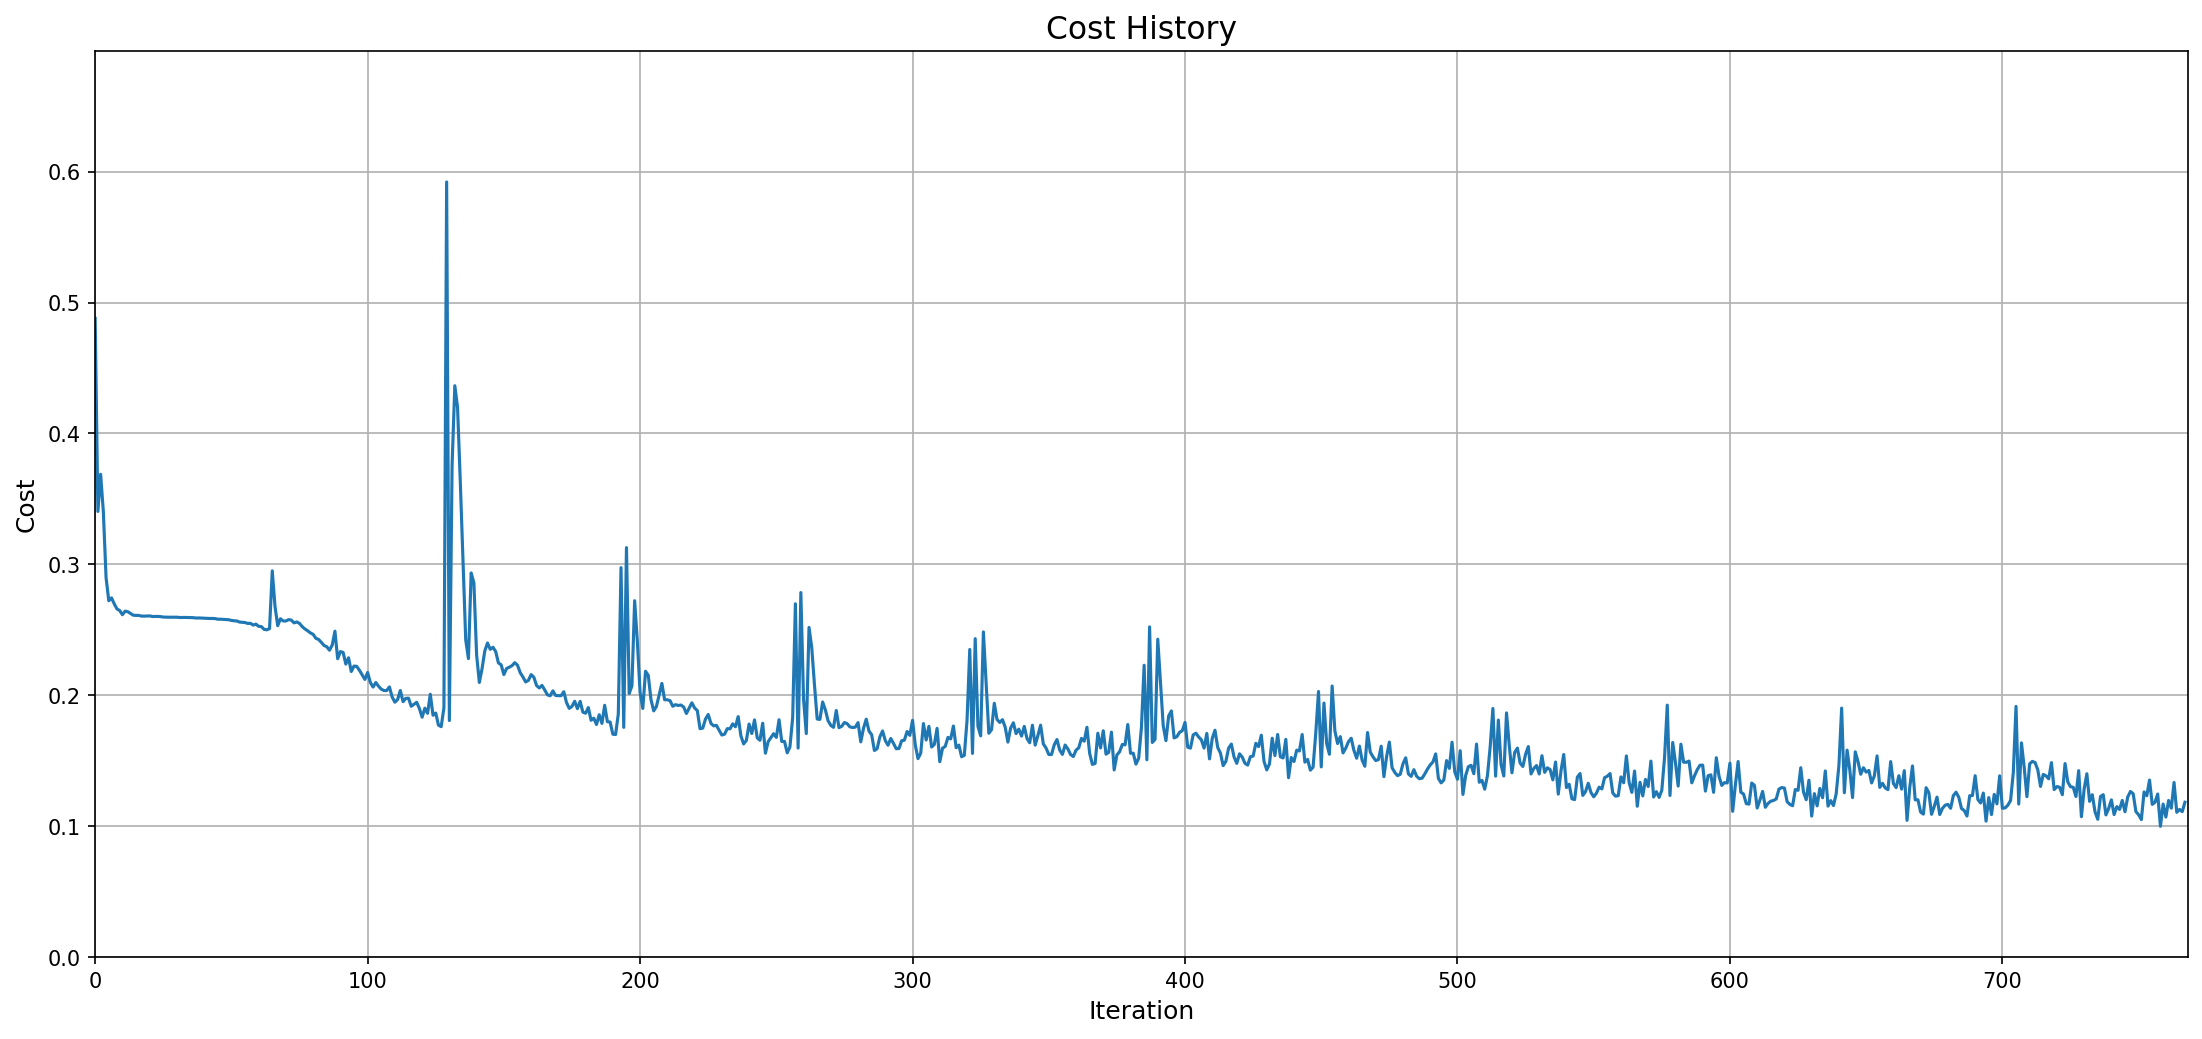

In [6]:
# COST HISTORY
plt.figure(figsize = [18, 8], dpi = 150)
plt.title('Cost History', fontsize = 15)

plt.xlim([0, len(model.cost_history)])
plt.ylim([0, max(model.cost_history)+0.1])
plt.xlabel('Iteration', fontsize = 12)
plt.ylabel('Cost', fontsize = 12)

plt.plot(model.cost_history)
plt.grid()
plt.show()

In [7]:
%%time
# Train Accuracy
correct = 0
for x, y in zip(X_train, Y_train):
    model.forward(x)
    pred = np.argmax(model.out)
    y = np.argmax(y)
    if pred == y: correct += 1
acc = correct / len(X_train)
print(f'Train Accuracy: {acc:.3f}')

Train Accuracy: 0.640
Wall time: 6min 32s


In [10]:
# Prediction Diversity
for x, y in zip(X_test[:10], Y_test[:10]):
    model.forward(x)
    pred = np.argmax(model.out)
    y = np.argmax(y)
    print(y,'->', pred)

6 -> 6
3 -> 1
6 -> 3
7 -> 7
6 -> 6
1 -> 1
3 -> 1
1 -> 0
7 -> 7
3 -> 1


In [11]:
%%time
# Test Accuracy
correct = 0
for x, y in zip(X_test, Y_test):
    model.forward(x)
    pred = np.argmax(model.out)
    y = np.argmax(y)
    if pred == y: correct += 1
acc = correct / len(X_test)
print(f'Test Accuracy: {acc:.3f}')

Test Accuracy: 0.624
Wall time: 2min 15s


In [12]:
# Save Model
model.save_weights('models/model_e12_a1e-3.txt')
# Save Training Cost History
np.savetxt('train_cost_e12.txt', model.cost_history, '%f')
print('Training costs saved in file train_cost_e12.txt')
# Save Validation Cost History
np.savetxt('valid_cost_e12.txt', model.valid_cost_history, '%f')
print('Validation costs saved in file valid_cost_e12.txt')

Weights saved in file models/model_e12_a1e-3.txt
Training costs saved in file train_cost_e12.txt
Validation costs saved in file valid_cost_e12.txt
